# **Lecture: The Perceptron and Logic**

"The **neural network** itself is not an algorithm, but rather a framework for many different machine learning algorithms to work together and process complex data inputs. Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules." 
https://en.wikipedia.org/wiki/Artificial_neural_network

$\mathbf{Def^n :}$ A **feedforward** network is a structure in which information moves forward from our $\mathbf{x}$ inputs, through the functions, to the $\mathbf{y}$ output, with no cycles back to previous layers.

<p style="text-align: center;"> <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/800px-Colored_neural_network.svg.png' width=400 alt='[img: Feedforward Net]'/>  </p>  
Image source: [By Glosser.ca](https://commons.wikimedia.org/w/index.php?curid=24913461))

The network should be thought of as a collection of composed functions. Each layer's output will be the input for the next layer. So, 

$$ \mathbf{y} =  f(\mathbf{x}) = \color{green} {f_3}( \color{blue} {f_2}( \color{red} {f_1}(\mathbf{x}))) $$  
The first layer that interacts with the features directly is called the <span style="color:red">input layer </span>. The last layer that will return the predicted target is called the <span style="color:green"> output layer </span>. Any layers in-between will be the <span style="color:blue"> hidden layers </span>.

---
## **The Perceptron**  
In machine learning, the **perceptron** is an algorithm for _**supervised learning**_ of _**binary classifiers**_. It is a type of linear binary classifier, that is that we will be using a hyperplane (point, line, plane ...) to aid with classification. The updating of the weights is done by the perceptron learning algorithm (see below). 

<p style="text-align: center;"> <img src='https://upload.wikimedia.org/wikipedia/en/5/52/Mark_I_perceptron.jpeg' width=400 alt='[img: IBM Perceptron]'/>  </p> 

https://en.wikipedia.org/wiki/File:Mark_I_perceptron.jpeg

"Mark I Perceptron machine, the first implementation of the perceptron algorithm. It was connected to a camera with 20×20 cadmium sulfide photocells to make a 400-pixel image. The main visible feature is a patch panel that set different combinations of input features. To the right, arrays of potentiometers that implemented the adaptive weights." https://en.wikipedia.org/wiki/Perceptron

### **Single Layer Perceptron by Example**

Let's look at an example of what we are working with.

The data for the image below would be $\displaystyle \mathbf{X} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7 \\ x_8 \end{bmatrix} $ with targets, 
$\displaystyle \mathbf{Y} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} $.

<p style="text-align: center;"> <img src= './PL_images/bias_1.jpg'> </p>

The first issue that we need to work on is the fact that the "line" that we are working with is not through the origin. So to fix this we are going to look at our data as being a "shadow" of a dimension above. So for the above example, we are going to think of the green point (the rectangle) as the point of intersection of the line $ x = 1$ and a line through the origin. This looks like the graph below. To deal with this in the data we can add a column of all $1$'s as the first column. This will constrain the data to the line $x = 1$ and allow us to use this higher dimensional perspective as a tool to achieve linearity. 

$$\displaystyle \mathbf{X} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\1 & x_3 \\1 & x_4 \\1 & x_5 \\ 1 & x_6 \\1 & x_7 \\1 & x_8 \end{bmatrix} $$

and the math that makes this all possible would be,
$$y  = \color{green} Ax $$
$$y - Ax = 0 $$
$$\langle 1 , -A \rangle \cdot \langle y, x \rangle = 0 $$
$$\langle w_0 , w_1 \rangle \cdot \langle 1 , x_i \rangle = 0 $$

<p style="text-align: center;"> <img src= './PL_images/bias_2.jpg' </p>

### **The perceptron learning algorithm** 

<p style="text-align: center;"> <img src= './PL_images/Perceptron.jpg' </p>
    
The above is the picture of the general idea, but let's break down how we are going to update the weights for the perceptron. Just like many of the previous examples, we are going to dot the weights with the features to get a prediction. And similar to the SVM method, the sign is going to play an important part in telling if we are correct. With these thoughts in mind consider,  
    
$$\mathbf{u} \cdot \mathbf{v} = |\mathbf{u}||\mathbf{v}|\cos \theta $$  
where $\theta$ is the angle between the vectors $\mathbf{u}$ and $\mathbf{v}$. So for our situation we will be looking at the vectors, $\mathbf{w}$ (the weights) and $\mathbf{x}$ (a feature vector). Now there are three different results that we can have. $\mathbf{w} \cdot \mathbf{x} = 0$, $\mathbf{w} \cdot \mathbf{x} < 0$ and $\mathbf{w} \cdot \mathbf{x} > 0$. Let's look at one of the images from above again and case it out.
    
<p style="text-align: center;"> <img src= './PL_images/bias_2.jpg' </p>    
    
Case 1 $\mathbf{w} \cdot \mathbf{x} = 0$:  
    This will happen when $\theta = \frac{\pi}{2}$ and would correspond to when the feature vector $\mathbf{x}$ is on the line. We will classify this as positive.  
    
Case 2 $\mathbf{w} \cdot \mathbf{x} > 0$:  
    This will happen when $0 < \theta < \frac{\pi}{2}$ and would correspond to when the feature vector $\mathbf{x}$ is on side that the weight vector is facing. We will classify this as positive.  
    
Case 3 $\mathbf{w} \cdot \mathbf{x} < 0$:  
    This will happen when $\frac{\pi}{2} < \theta < \pi$ and would correspond to with the feature vector $\mathbf{x}$ is on side that the weight vector is not facing. We will classify this as negative. 

Now that we have a way to classify the feature vectors, and we have a way to make the classification boundary linear, we need to address how we will update the weights. First off, if the prediction is correct, we are not going to update the weights. So if $\mathbf{w} \cdot \mathbf{x} > 0$ and the correct target is positive, then we leave the weights alone, and same with the negative prediction. So now for when the prediction is wrong.  
    
Case Wrong 1: If $\mathbf{w} \cdot \mathbf{x} < 0$ but $y = 1$  then $\mathbf{w_{new}} = \mathbf{w_{current}} + \mathbf{x}$ where $\mathbf{x}$ is the feature vector that got us here.  
Case Wrong 2: If $\mathbf{w} \cdot \mathbf{x} > 0$ but $y = 0$  then $\mathbf{w_{new}} = \mathbf{w_{current}} - \mathbf{x}$ where $\mathbf{x}$ is the feature vector that got us here.  
    
**Reason to believe:**
    
If $\mathbf{w} \cdot \mathbf{x} < 0$ but $y = 1$ then we need to move If $\mathbf{w} \cdot \mathbf{x}$ in the positive direction. Consider, 
    
$$(\mathbf{w}+ \mathbf{x}) \cdot \mathbf{x} = \mathbf{w} \cdot \mathbf{x} + \mathbf{x} \cdot \mathbf{x} = \mathbf{w} \cdot \mathbf{x} + |\mathbf{x}|^2 $$  

This will move $\mathbf{w} \cdot \mathbf{x}$ in the direction we need. For the other case we will have a subtraction.

---
## **Example: Neural Networks and Logic**

Consider the following:
$$ X = \begin{bmatrix}1 & 1 & 0 \\1 & 0 & 1  \\1 & 1 & 1 \\1 & 0 & 0 \end{bmatrix} $$

In [1]:
import numpy as np # Math
import matplotlib.pyplot as plt # Plotting

<p style="text-align: center;"> <img src= 'https://ih0.redbubble.net/image.55190851.0507/flat,550x550,075,f.u3.jpg' /> </p

In [2]:
# This is the Heaviside Function.
def hev(v):
    if v > 0: # Positive values are 1.
        return 1
    else: # Negative values are 0.
        return 0

<p style="text-align: center;"> <img src= './PL_images/XOR.jpg'> </p>

In [3]:
# This is the perceptron update functions
def perceptron(w, x, y):
    if hev(np.dot(w, x)) <= 0: # Check the prediction value (Use the Heaviside Function to get back to the range.)
        if y == 0: # If correct, don't update the weights.
            return w 
        else: # Otherwise update by addition due to being too low.
            return w + x
    else:
        if y == 1: # If correct, don't update the weights.
            return w
        else: # Otherwise update by subtraction due to being too high.
            return w - x

<p style="text-align: center;"> <img src='https://cdn-images-1.medium.com/max/1200/1*zq3cbyx-xd_SRq8EwzER0w.jpeg' width=800 alt='[img: Logic Gates]'/>  </p>  
[Image source](https://medium.com/autonomous-agents/how-to-teach-logic-to-your-neuralnetworks-116215c71a49)

In [4]:
# This allows us to consider the four different gates.
def setgate(TARGET):
    
    if TARGET == "NOT":
        X = np.array([[1,  0],
                      [1,  1]])
        Y = np.array([[1,  0]])
        W = np.array([[0 , 0]])
    
    else:
        # These are the logic bits for the gates. The first bit is always on to correspond.
        X = np.array([[1,   1, 0],
                      [1,   0, 1],
                      [1,   1, 1],
                      [1,   0, 0]])

        # This is the AND gate. The bit will turn on if both logic bits are on.
        if TARGET == "AND":
            Y = np.array([[0, 
                           0, 
                           1, 
                           0]])
            plt.scatter([1], [1], c="r") # Plot the AND state.
            plt.scatter([0,1,0], [0,0,1], c = "b") # Plot the other states.

        # This is the AND gate. The bit will turn on if both logic bits are on.
        if TARGET == "NAND":
            Y = np.array([[1, 
                           1, 
                           0, 
                           1]])
            plt.scatter([0, 0, 1], [0, 1, 0], c="r") # Plot the AND state.
            plt.scatter([1], [1], c = "b") # Plot the other states.

        # This is the OR gate. The bit will turn on if either logic bit is one or if both are on.
        if TARGET == "OR":
            Y = np.array([[1, 
                           1, 
                           1, 
                           0]])
            plt.scatter([1, 0, 1], [0, 1, 1], c="r") # Plot the OR state.
            plt.scatter([0], [0,], c = "b") # Plot the other states.


        # This is the NOR gate. The bit will turn on if none of he gates are on.
        if TARGET == "NOR":
            Y = np.array([[0, 
                           0, 
                           0, 
                           1]])
            plt.scatter([0], [0], c="r") # Plot the NOR state.
            plt.scatter([1,0,1], [0,1,1], c = "b") # Plot the other states.

        # This is the XOR gate. The bit will turn on if either of the gates are on, but not both.
        if TARGET == "XOR":
            Y = np.array([[1, 
                           1, 
                           0, 
                           0]])
            plt.scatter([1,0], [0,1], c= "r") # Plot the XOR state.
            plt.scatter([1,0], [1,0], c = "b") # Plot the other states.

        # Initilize the weights.
        W = np.array([[0, 0, 0]])
    
    return [W,X,Y] # Return the data.

array([[1, 1, 0],
       [1, 0, 1],
       [1, 1, 1],
       [1, 0, 0]])

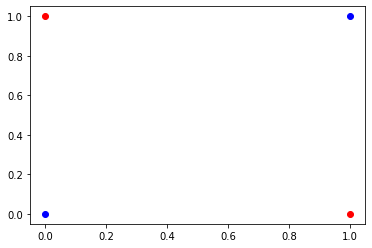

In [5]:
setgate("XOR")[1]

In [6]:
def lineofclassification(switch, EPOCHS):
    
    # Get the data and the correct target for the gate that we are looking at.
    DATA = setgate(switch)
    
    W = DATA[0] # Weights.
    X = DATA[1] # The logic bits.
    Y = DATA[2] # The correct logic gate structure for the given target.
    print(np.shape(W))
    t = np.linspace(0, 1) # Set a linear domain of values to allow us to plot the line. 
    j = 0 # Start a counter for the epochs.

    # Loop over the data EPOCHS times.
    while j < EPOCHS:
        i = 0 # Start a counter to loop through the gate states in the target vector.
        
        # Loop over all the input vectors.
        for x in X:
            W = perceptron(W, x, Y[0][i]) # Update the weights using the perceptron rule.
            
            # This will make it so that only the last 4 graphs are plotted. This makes sure that if there is still some convergence in the weights we will see it.
            if j > (EPOCHS - 4) and np.shape(W)[1] == 3:
                if W[0][2] == 0: # Check to see if the denominator is zero.
                    plt.axvline(x=0) # If so plot a vertical line.
                else:
                    plt.plot(t, (-W[0][0] - t * W[0][1]) / W[0][2]) # Plots the line for the current wieght matrix. (This is mostly for XOR)
            
            i += 1 # Index up for the current loop through th input data.
        j += 1 # Index up for the epochs.
     
    # Print a readout of the final weight matrix.
    print("The weight matrix for", switch, "is", W, ".")
    
    # Plot the final line.
    if np.shape(W)[1] == 3:
        plt.plot(t, (-W[0][0] - t * W[0][1]) / W[0][2])
        plt.show() # Show all the plots.
    
    return W

(1, 3)
The weight matrix for AND is [[-2  1  2]] .


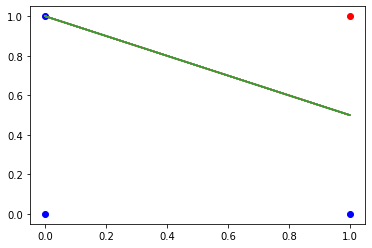

(1, 3)
The weight matrix for OR is [[0 1 1]] .


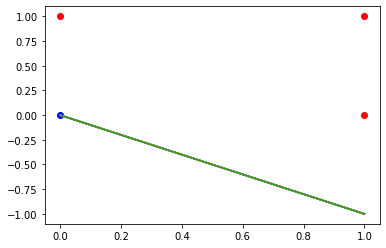

(1, 3)
The weight matrix for NOR is [[ 1 -1 -1]] .


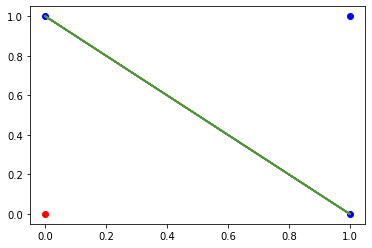

(1, 3)
The weight matrix for NAND is [[ 3 -1 -2]] .


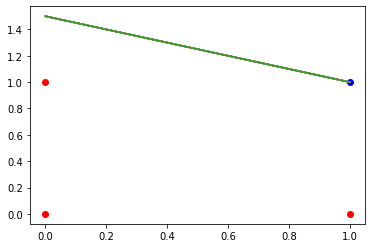

(1, 3)
The weight matrix for XOR is [[ 0  0 -1]] .


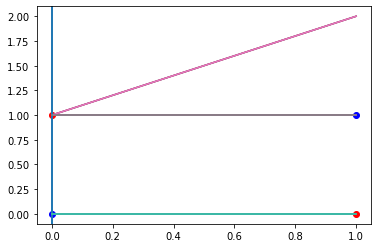

array([[ 0,  0, -1]])

In [7]:
logic = {"AND", "OR", "NOR", "NAND"} # Directory for the logic keywords. (XOR is missing so it is last in the graph print below.)

# Loop over the keywords.
for gate in logic:
    lineofclassification(gate, 10000)
lineofclassification("XOR", 10000) # ... Now consider XOR.

We can see now that this isn't going to work. Another way to look at it is to consider the following image.

<p style="text-align: center;"> <img src= './PL_images/XOR_graph.jpg' </p>

---
So as we can see from the last example, we won't be able to use just a Perceptron for the task of classification. We are going to need to develope something more...